In [83]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

In [94]:
metrics_path = "../logs/checkpoints_23032022_133010/metrics_synth/"
nb_folds=3
metrics_to_plot = ['val_loss', 'val_acc', 'val_ap', 'train_loss_epoch', 'train_acc_epoch', 'train_ap']


In [98]:
values = defaultdict(list)

for fold_nb in range(nb_folds):
    fold_string = f"fold_{fold_nb}"
    print(fold_string)
    event_acc = EventAccumulator(join(metrics_path, fold_string))
    event_acc.Reload()
    print(event_acc.Tags())
    #print(event_acc.Scalars('val_loss'))
    for tag in metrics_to_plot:
        _, step_nums, vals = zip(*event_acc.Scalars(tag))
        values[tag].append(np.around(vals, 4))
        values[f'{tag}_step'].append(step_nums)
        values['fold_nb'].append(fold_nb)
    
pprint(values)                    

fold_0
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['hp_metric', 'test_loss', 'test_acc', 'test_ap', 'test_auroc', 'epoch'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


KeyError: 'Key val_loss was not found in Reservoir'

5


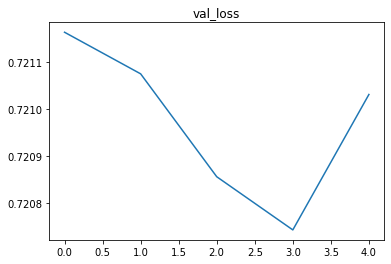

5


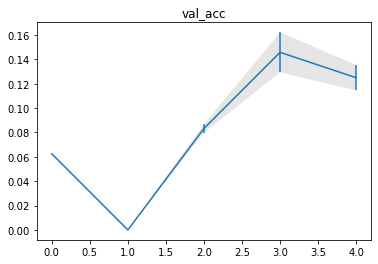

5


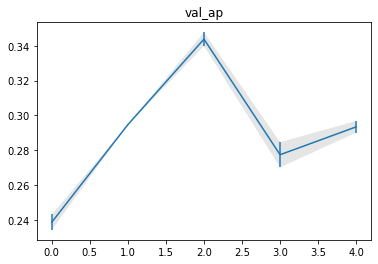

1


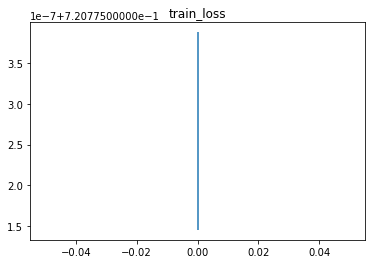

5


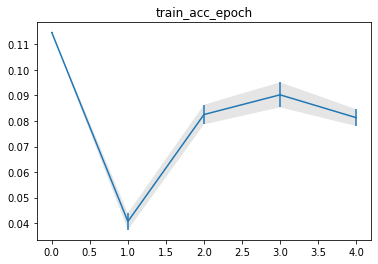

5


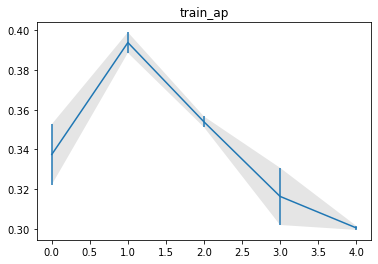

In [79]:
for val_name in values.keys():
    if 'step' not in val_name and 'fold' not in val_name:
        mean_val = np.mean(values[val_name], axis=0)
        var_val = np.var(values[val_name], axis=0)
        print(len(var_val))
        epochs = np.arange(len(var_val))
        plt.errorbar(epochs, mean_val, yerr=var_val)
        plt.fill_between(epochs, mean_val-var_val, mean_val+var_val ,alpha=0.1, facecolor='k')
        plt.title(val_name)
        plt.show()